<a href="https://colab.research.google.com/github/Yousma789/Yousma789/blob/main/Yousma_Ali_Pneumonia_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
zip_file_path = '/content/drive/My Drive/chest-xray.zip'

# Copy zip to Colab
shutil.copy(zip_file_path, '/content/')

# Extract the zip file
shutil.unpack_archive('/content/chest-xray.zip', '/content/extracted_files/')

print("Extraction completed.")


Extraction completed.


In [ ]:
train_dir = '/content/extracted_files/chest_xray/train' # Changed path to reflect the extracted folder structure
test_dir = '/content/extracted_files/chest_xray/test' # Changed path to reflect the extracted folder structure
val_dir = '/content/extracted_files/chest_xray/val' # Changed path to reflect the extracted folder structure

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 624 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.7186 - loss: 0.6094 - val_accuracy: 0.7500 - val_loss: 0.7197
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.8859 - loss: 0.2755 - val_accuracy: 0.9375 - val_loss: 0.5650
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9011 - loss: 0.2475 - val_accuracy: 0.6875 - val_loss: 1.2581
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9047 - loss: 0.2269 - val_accuracy: 0.7500 - val_loss: 0.5739
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9210 - loss: 0.2062 - val_accuracy: 0.6875 - val_loss: 0.6521
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.9260 - loss: 0.1989 - val_accuracy: 0.6875 - val_loss: 1.0854
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.9317 - loss: 0.1817 - val_accuracy: 0.8750 - val_loss: 0.5765
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9444 - loss: 0.1497 - val_accu

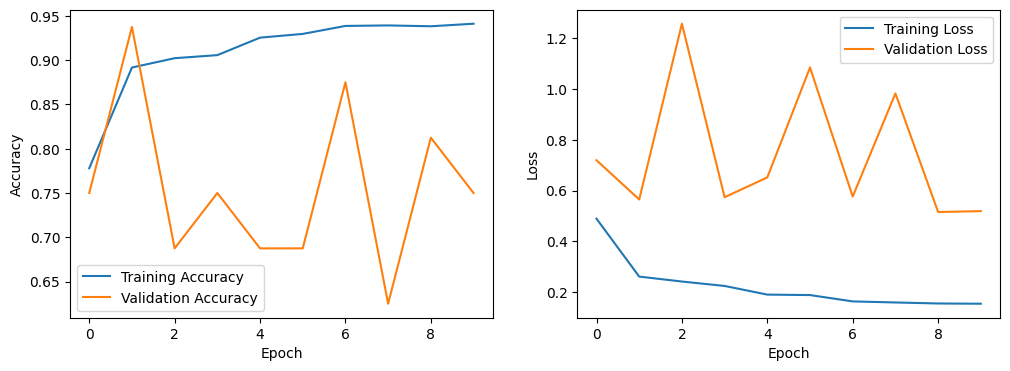

In [ ]:
# prompt: Model Building
# Build a Convolutional Neural Network (CNN) model using a framework like TensorFlow or Keras.

import matplotlib.pyplot as plt
import numpy as np
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Important: Set shuffle to False for accurate evaluation
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(2, activation='softmax') # Output layer with softmax for multi-class classification
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))
print(confusion_matrix(y_true, y_pred_classes))


# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# prompt: Model Evaluation
# Evaluate your model's performance on a test dataset.

# Get the class indices from the test generator
class_indices = test_generator.class_indices

# Print the class indices
print("Class Indices:", class_indices)

# Get the class labels in the correct order
class_labels = list(class_indices.keys())

# Print the classification report and confusion matrix with class labels
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
print(confusion_matrix(y_true, y_pred_classes))


Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}
              precision    recall  f1-score   support

      NORMAL       0.96      0.74      0.84       234
   PNEUMONIA       0.86      0.98      0.92       390

    accuracy                           0.89       624
   macro avg       0.91      0.86      0.88       624
weighted avg       0.90      0.89      0.89       624

[[173  61]
 [  7 383]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


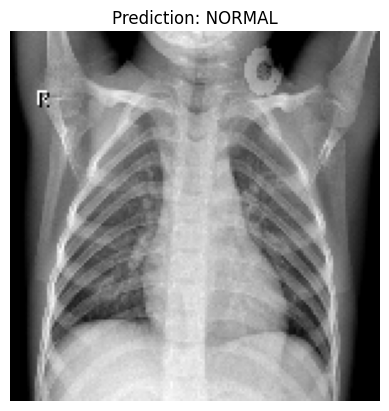

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


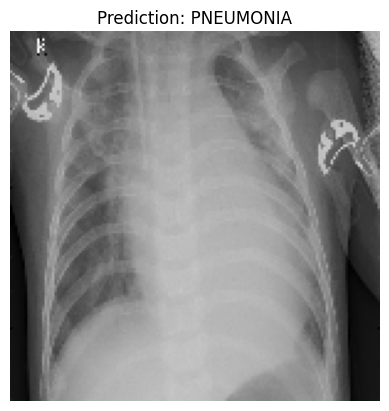

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


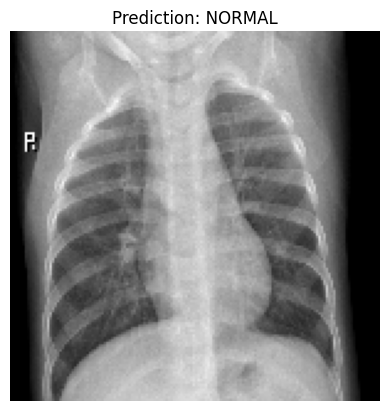

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


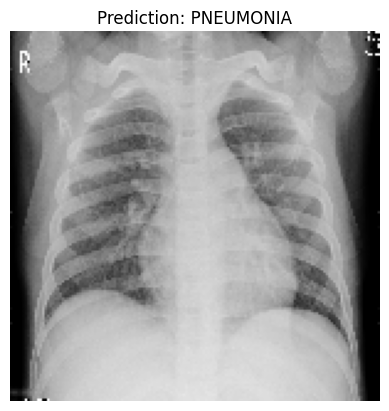

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


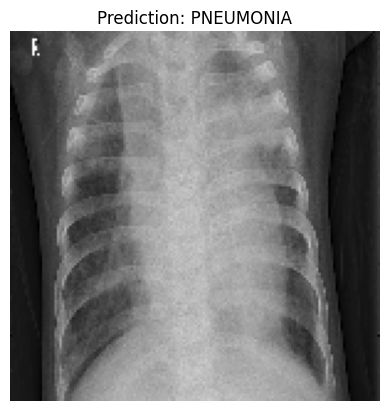

In [ ]:
# prompt: prediction of pneumonia or normal with random 5 images show images also

import numpy as np
import random
import matplotlib.pyplot as plt

# Assuming 'test_generator' and 'model' are defined from the previous code

# Get a random sample of 5 images from the test set
num_images_to_display = 5
test_image_indices = random.sample(range(len(test_generator.filenames)), num_images_to_display)

for i in test_image_indices:
    # Load the image
    image_path = os.path.join(test_dir, test_generator.filenames[i])
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Normalize the image

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = list(test_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()


Saving xray1 to xray1 (1)
User uploaded file "xray1 (1)" with length 30954 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


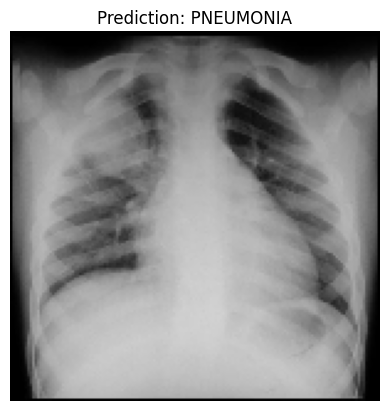

The predicted label for xray1 (1) is: PNEUMONIA


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# ... (rest of your existing code)

# Function to upload and predict
def predict_uploaded_image(uploaded_file):
    try:
        img = image.load_img(uploaded_file, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        class_labels = list(test_generator.class_indices.keys())
        predicted_label = class_labels[predicted_class]

        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predicted_label = predict_uploaded_image(fn)
    if predicted_label:
        print(f"The predicted label for {fn} is: {predicted_label}")


Saving xray2.jpeg to xray2 (1).jpeg
User uploaded file "xray2 (1).jpeg" with length 35795 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


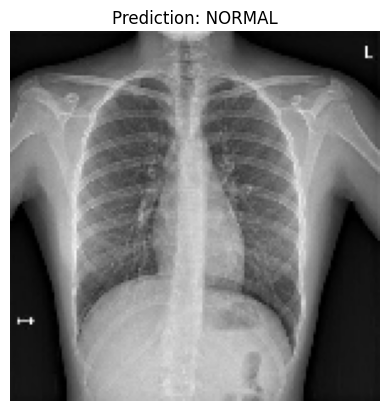

The predicted label for xray2 (1).jpeg is: NORMAL


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# ... (rest of your existing code)

# Function to upload and predict
def predict_uploaded_image(uploaded_file):
    try:
        img = image.load_img(uploaded_file, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        class_labels = list(test_generator.class_indices.keys())
        predicted_label = class_labels[predicted_class]

        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predicted_label = predict_uploaded_image(fn)
    if predicted_label:
        print(f"The predicted label for {fn} is: {predicted_label}")


Saving xray3.jpg to xray3.jpg
User uploaded file "xray3.jpg" with length 4209 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


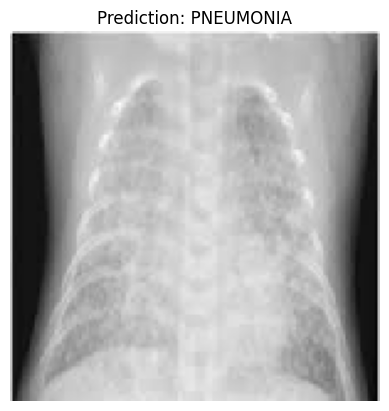

The predicted label for xray3.jpg is: PNEUMONIA


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# ... (rest of your existing code)

# Function to upload and predict
def predict_uploaded_image(uploaded_file):
    try:
        img = image.load_img(uploaded_file, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        class_labels = list(test_generator.class_indices.keys())
        predicted_label = class_labels[predicted_class]

        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predicted_label = predict_uploaded_image(fn)
    if predicted_label:
        print(f"The predicted label for {fn} is: {predicted_label}")

Saving xray 04.jpg to xray 04.jpg
User uploaded file "xray 04.jpg" with length 20175 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


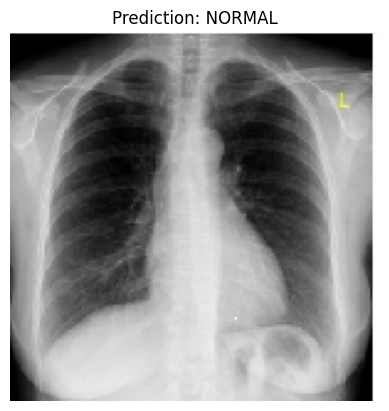

The predicted label for xray 04.jpg is: NORMAL


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# ... (rest of your existing code)

# Function to upload and predict
def predict_uploaded_image(uploaded_file):
    try:
        img = image.load_img(uploaded_file, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        class_labels = list(test_generator.class_indices.keys())
        predicted_label = class_labels[predicted_class]

        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predicted_label = predict_uploaded_image(fn)
    if predicted_label:
        print(f"The predicted label for {fn} is: {predicted_label}")

Saving xray 5.jpeg to xray 5.jpeg
User uploaded file "xray 5.jpeg" with length 35795 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


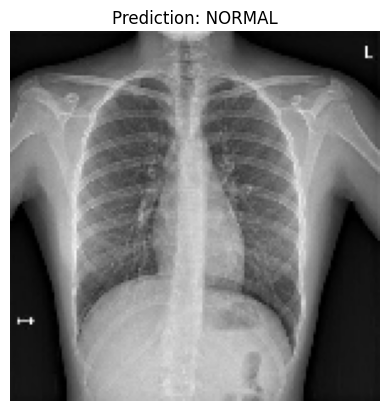

The predicted label for xray 5.jpeg is: NORMAL


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# ... (rest of your existing code)

# Function to upload and predict
def predict_uploaded_image(uploaded_file):
    try:
        img = image.load_img(uploaded_file, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        class_labels = list(test_generator.class_indices.keys())
        predicted_label = class_labels[predicted_class]

        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predicted_label = predict_uploaded_image(fn)
    if predicted_label:
        print(f"The predicted label for {fn} is: {predicted_label}")

Saving xray 6.jpeg to xray 6.jpeg
User uploaded file "xray 6.jpeg" with length 39028 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


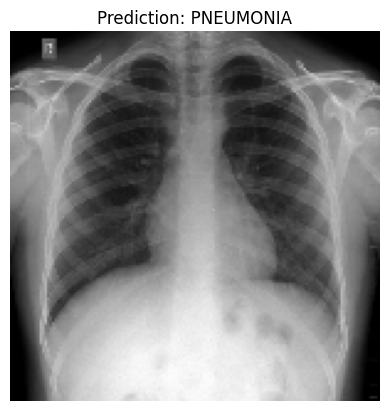

The predicted label for xray 6.jpeg is: PNEUMONIA


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# ... (rest of your existing code)

# Function to upload and predict
def predict_uploaded_image(uploaded_file):
    try:
        img = image.load_img(uploaded_file, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        class_labels = list(test_generator.class_indices.keys())
        predicted_label = class_labels[predicted_class]

        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predicted_label = predict_uploaded_image(fn)
    if predicted_label:
        print(f"The predicted label for {fn} is: {predicted_label}")